In [1]:
from fenics import *
import numpy as np
import mshr
import matplotlib.pyplot as plt
%matplotlib inline

Calling FFC just-in-time (JIT) compiler, this may take some time.


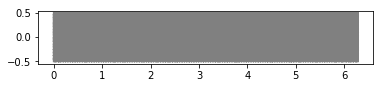

In [2]:
xmin, xmax = 0, 2*pi
ymin, ymax = -.5, .5
radius = 0.5
geom = mshr.Rectangle(Point(xmin, ymin),Point(xmax, ymax))
mesh = mshr.generate_mesh(geom,100)
plot(mesh)
element = VectorElement("P", triangle, degree = 1)
# Create function space
V = FunctionSpace(mesh, element)
# Create test and trial functions, and source term
u = TrialFunction(V)
v = TestFunction(V)

Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/maurini/fenics/2018.1.0/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/maurini/fenics/2018.1.0/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


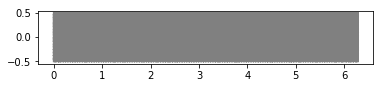

In [3]:
x = SpatialCoordinate(mesh)
y = interpolate(Expression(("(1-x[1])*sin(x[0])","1-(1-x[1])*cos(x[0])"),degree=4),V)
u = project(y-x,V)
#ALE.move(mesh,u)
plot(mesh)

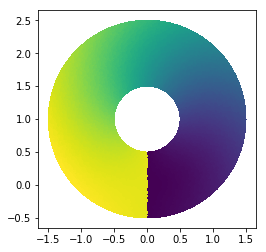

In [4]:
plot(u,mode="displacement")

In [5]:
F = grad(u) + Identity(2)

In [6]:
C = F.T*F

Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/maurini/fenics/2018.1.0/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


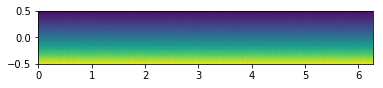

In [7]:
fig = plot(C[0,0])

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/maurini/fenics/2018.1.0/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/maurini/fenics/2018.1.0/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


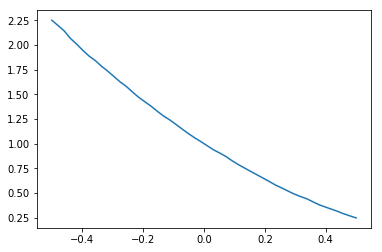

In [8]:
Ct = project(C,TensorFunctionSpace(mesh,'CG',1))
values = np.array([[s,Ct(1.,s)[0]] for s in np.linspace(-.5,.5,50)])
plt.plot(*values.transpose())